In [70]:
import pandas as pd
import seaborn as sns
import json
import pandas
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [71]:
# 1989-01-01 and 2020-12-31
#df = pd.read_csv(r'C:\Users\matth\OneDrive - GENES\ENSAE 2A\Python pour le data scientist/ged211.csv')
df = pd.read_csv('/Users/mcolas/Documents/ged211.csv')
#df = pd.read_csv('../UCDP.csv')

Nous nous intéressons tout d'abord au nombre de décès par conflit, un conflit étant une série d'événements impliquant plusieurs acteurs, gouvernements ou autres organisations et pouvant se dérouler sur plusieurs territoires au cours du temps. Le tableau suivant présente les principales caractéristiques de cette variable. Le nombre médian de décès par conflit est de 123 et le conflit le plus mortel survenu entre 1989 et 2020 a causé la mort de près de 550 milles individus. Après une rapide manipulation du tableau, on trouve que ce conflit englobe le génocide des Tutsi au Rwanda de 1994. Nous isolerons ce conflit par la suite afin de mieux visualiser les statistiques d'intérêt.

In [72]:
# Statistiques du nombre de morts par conflit
df_victimes_conflit = df.groupby(['conflict_new_id']).sum()
pd.DataFrame(df_victimes_conflit.describe()['best'].astype(int)).T

,count,mean,std,min,25%,50%,75%,max
best,1289,2087,19088,25,54,123,415,542712


In [68]:
#on extrait le conflit qui a fait le plus de victimes, cela nous sera utile par la suite
max_victimes = df_victimes_conflit['best'].max()
df_victimes_conflit[df_victimes_conflit['best']==max_victimes].index
# c'est le conflit 472
df[df['conflict_new_id']==472][['country', 'year']] #on comprend que ce conflit englobe le génocide au Rwanda de 1994

,country,year
51922,Burundi,1994
51923,Burundi,1994
51924,Burundi,1996
63782,DR Congo (Zaire),1994
63783,DR Congo (Zaire),1994
...,...,...
147031,Rwanda,2017
147032,Rwanda,2017
147033,Rwanda,2017
147034,Rwanda,2017


_Types de conflits_
Nous regardons la répartition des conflits par type de violence : les conflits étatiques, non étatiques, et unilatéraux faisant référence à des actes terroristes contre des civils. Premier fait notable, le nombre de conflits annuel a doublé entre 1989 et 2020. Cette hausse a principalement eu lieu durant la dernière décennie. Ces conflits se répartissent de manière assez équitables entre les trois types, bien que l'on puisse noter une légere augmentation des conflits entre organisations non-étatiques depuis 1989.

Text(0, 0.5, 'Nombre de conflits')

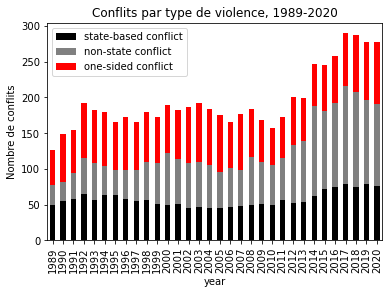

In [64]:
# Évolution du nombre de conflits par type de violence
df_unique_conflit = df.drop_duplicates(subset=['conflict_new_id','year'])

df_conflit_type = df_unique_conflit.pivot_table(values='best', index='year', columns='type_of_violence', aggfunc='count')
#sns.histplot(data=df_unique_conflit,x='year', shrink = 0.5, hue='type_of_violence', multiple='stack', discrete=True)
ax = df_conflit_type.plot(kind='bar', stacked=True, title='Conflits par type de violence, 1989-2020', color=['black', 'grey', 'red'])
ax.legend(['state-based conflict','non-state conflict','one-sided conflict'])
ax.set_ylabel('Nombre de conflits')


Le nombre de conflits par type ne permet d'en déduire la dangerosité associée à un type de conflit. Il est dans ce cas plus pertinent de regarder comment sont répartis les décès provoqués par chaque type de conflit. Aussi, nous réalisons l'histogramme ci-dessous, montrant l'évolution du nombre de victimes par type de conflit chaque année. Nous remarquons alors une valeur extrême en 1994, faisant état de près de 600 000 morts au cours d'un conflit de type unilatéral. Nous retrouvons ici le génocide au Rwanda précedemment identifié. Nous faisons le choix de retirer l'ensemble des événements liés à ce conflit par la suite afin d'augmenter la lisibilité de nos graphiques.

Text(0, 0.5, 'Nombre de conflits')

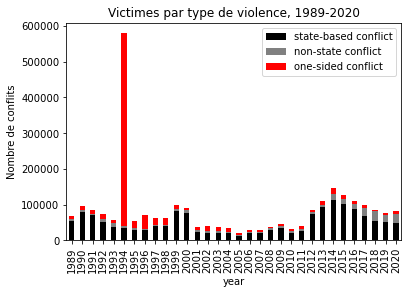

In [65]:
# Évolution du nombre de victimes des conflits par type de violence au cours du temps
df_morts_type = df.pivot_table(values='best', index='year', columns='type_of_violence', aggfunc=sum)
ax = df_morts_type.plot(kind='bar', stacked=True, title='Victimes par type de violence, 1989-2020',color=['black', 'grey', 'red'])

ax.legend(['state-based conflict','non-state conflict','one-sided conflict'])
ax.set_ylabel('Nombre de conflits')

# les conflits entre États sont ceux qui, de loin, génèrent le plus de victimes

Le graphique ci-dessous ne compte donc pas le conflit au Rwanda de 1994. Nous remarquons que les conflits survenus durant la décennie 2011-2020 ont causé le plus de décès, alors que la décennie précédente, 2001-2010, avait été la moins mortelle sur l'ensemble de notre période d'étude. Par ailleurs, alors que les conflits sont en terme de nombre équitablement répartis dans les trois catégories, nous remarquons ici que les conflits entre États sont en fait nettement plus mortels que les autres.

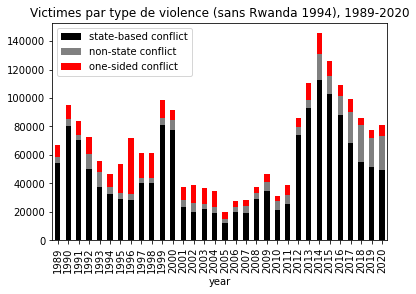

In [73]:
index_to_drop = df[df.country=='Rwanda'][df.year==1994].index.values
df_corrige = df.drop(index=index_to_drop)
df_morts_type_corrige = df_corrige.pivot_table(values='best', index='year', columns='type_of_violence', aggfunc=sum)
ax = df_morts_type_corrige.plot(kind='bar', stacked=True, title='Victimes par type de violence (sans Rwanda 1994), 1989-2020',color=['black', 'grey', 'red'])

ax.legend(['state-based conflict','non-state conflict','one-sided conflict'])

Nous nous intéressons ensuite à la répartition géographique des conflits. La hausse du nombre de conflit sur les 30 dernières années est en fait principalement le résultat de la hausse du nombre de conflits survenus en Afrique. En 2020, près de 2 conflits sur 3 ont lieu sur ce continent. Dans les autres régions, l'évolution est relativement stable au cours du temps. C'est en europe que les conflits ont les plus rares [chiffres] 

Text(0, 0.5, 'Nombre de conflits')

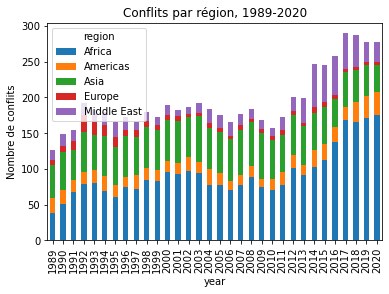

In [62]:
# Évolution du nombre de conflits par région 

df_conflit_region = df_unique_conflit.pivot_table(values='best', index='year', columns='region', aggfunc='count')
#sns.histplot(data=df_unique_conflit,x='year', shrink = 0.5, hue='type_of_violence', multiple='stack', discrete=True)
ax = df_conflit_region.plot(kind='bar', stacked=True, title='Conflits par région, 1989-2020')
ax.set_ylabel('Nombre de conflits')


#sns.histplot(data=df_unique_conflit,x='year', hue='region', multiple='stack', discrete=True).set(title="Nombre de conflits par région, 1989-2020 ")
#on observe de plus en plus de conflits en Afrique, ils représentent plus de la moitié des conflits mondiaux en 2020

In [10]:
# Évolution du nombre de conflits par région (densité)
#sns.kdeplot(data=df_unique_conflit,x='year', hue='region', multiple='stack').set(title="Densité du nombre de conflits par région, 1989-2020")

[Text(0, 0.5, 'nombre de victimes'),
 Text(0.5, 1.0, 'Victimes des conflits par région, 1989-2020')]

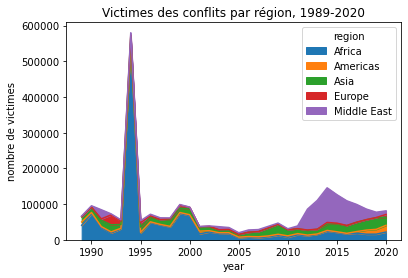

In [40]:
# Évolution du nombre de victimes de conflits par région (area plot)
df_morts_region = df.pivot_table(values='best', index='year', columns='region', aggfunc=sum)

df_morts_region.plot.area().set(ylabel='nombre de victimes',title = 'Victimes des conflits par région, 1989-2020')


# le pic correspond au génocide des Tutsi au Rwanda en 1994. On retire cette valeur extrême pour mieux visualiser l'évolution au niveau mondiale

Comme précdemment, nous observons aussi la létalité des conflits par région afin d'appréhender d'une autre façon la dangerosité d'une zone géographique. Nous faisons là aussi le choix d'omettre le conflit au Rwanda de 1994 pour mieux visualiser les tendances. Il apparaît que l'Afrique et le Moyen-Orient ont été au cours de ces trentes dernières années les théâtres des affrontements les plus mortels. L'Afrique domine les statistiques jusqu'en 2000 puis, à partir des années 2010, le Moyen Orient connait une forte croissance du nombre de victimes liées aux conflits.

[Text(0, 0.5, 'nombre de victimes'),
 Text(0.5, 1.0, 'Victimes des conflits par région (sans Rwanda 1994), 1989-2020')]

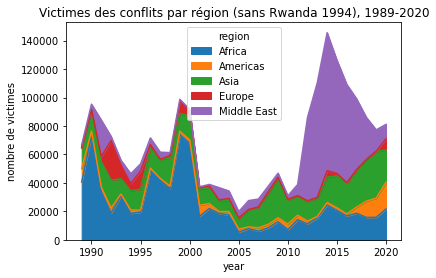

In [12]:
# Évolution du nombre de victimes de conflits par région (sans Rwanda 1994)

df_morts_region_corrige = df_corrige.pivot_table(values='best', index='year', columns='region', aggfunc=sum)

df_morts_region_corrige.plot.area().set(ylabel='nombre de victimes',title = 'Victimes des conflits par région (sans Rwanda 1994), 1989-2020')

# alors que les conflits ont principalement lieu en Afrique en terme de nombres, c'est au Moyen-Orient 
#qu'ils ont été les plus mortels au cours de la dernière décennie

Finalement, nous cherchons à visualiser l'évolution par région de notre indicateur "ratio" précedemment défini. Ce dernier quantifie la dangérosité relative des régions pour une année donnée. Nous retrouvons logiquement des variations similaires au graphique précédent mais celles-ci sont encore plus parlantes. Notamment, en plus des analyses déjà formulées au sujet de la mortalité des conflits au Moyen-Orient et en Afrique, nous visualisons mieux la prépondérance de l'Asie dans les victimes de conflits au cours des années 2005-2010. De plus, la dangerosité relative des conflits survenus en Europe et en Amérique augmente significativement depuis les dernières années après une longue période de stagnation à un bas niveau. La tendance actuelle est aussi à la hause sur le continent africain. Inversement, les tendances récentes sont à la baisse pour le Moyen_orient et l'Asie.

[Text(0.5, 1.0, 'Évolution du ratio par région, 1989-2020')]

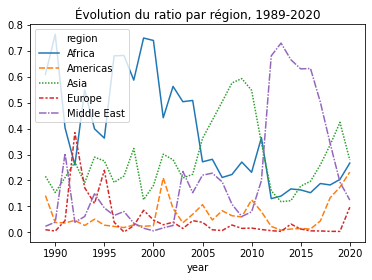

In [26]:
df_morts_region_corrige_bis = df_morts_region_corrige.copy()
df_morts_region_corrige_bis['morts_par_an'] = df_morts_region_corrige.sum(axis=1).astype(int)

df_ratio_region_corrige = df_morts_region_corrige_bis.divide(df_morts_region_corrige_bis['morts_par_an'], axis=0).drop(columns = 'morts_par_an')
#df_ratio_region_corrige

#df_ratio_region_corrige.plot()

sns.lineplot(data=df_ratio_region_corrige).set(title = "Évolution du ratio par région, 1989-2020")

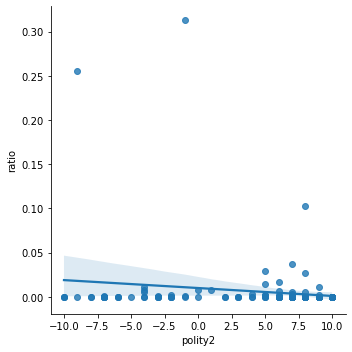

In [75]:
df_regression = pd.read_csv('/Users/mcolas/Documents/df_regression.csv')
df_2018 = df_regression[df_regression['year']==2018]#[df_regression['ratio']<0.1]
sns.lmplot(x="polity2", y="ratio", data=df_2018)
